In [ ]:
%pip install numpy  

In [ ]:
#---------------------A(using Bisection Method)------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x)*(3.2*np.sin(x)-0.5*np.cos(x))

a,b = 3,4
esp=0.001
data=[]
i=0

while (b-a)/2 > esp:
    c = (a+b)/2
    data.append([i,a,b,c,f(c)])
    
    if f(a)* f(c) < 0:
        b=c
    else:
        a=c
    i+=1
    
root = (a+b)/2

table = pd.DataFrame(data, columns=["Iter","a","b","c","f(c)"])


print (table)
print("\nRoot :", root)


x = np.linspace(3,4,400)
plt.axhline(0)
plt.plot(x,f(x))
plt.scatter(root,f(root))
plt.show()


#---------------------using Regula Falsi Method---------------------#
while True:
    c = (a*f(b)-b*f(a))/(f(b)-f(a))
    data.append([i,a,b,c,f(c)])
    
    if abs(f(c))<esp:
        break
    
    if f(a)*f(c)<0:
        b=c
    else:
        a=c
    i+=1

root = c

table = pd.DataFrame(data, columns=["ITER","a","b","c","f(c)"])

print(table)

print("\nRoot:", root)

x=np.linspace(3,4,400)
plt.axhline(0)
plt.plot(x,f(x))
plt.scatter(root,f(root))
plt.title("Regular Falsi Method")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()


Step size: 0.1
     t    Euler_y   Exact_y      Error
0  1.0  -0.971672 -1.580999   0.609327
1  2.0   0.652703 -1.478803   2.131506
2  3.0   7.302090  2.914388   4.387702
3  4.0  15.561284  6.745804   8.815480
4  5.0  21.954653 -1.612374  23.567028


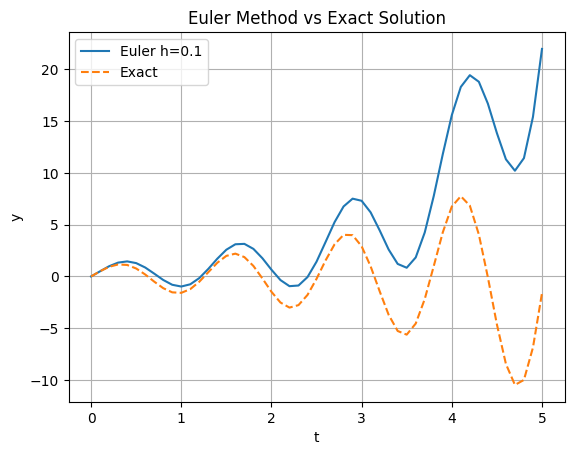


Step size: 0.05
     t    Euler_y   Exact_y      Error
0  1.0  -1.265117 -1.580999   0.315882
1  2.0  -0.343268 -1.478803   1.135534
2  3.0   5.346822  2.914388   2.432434
3  4.0  11.848391  6.745804   5.102587
4  5.0  12.240178 -1.612374  13.852552


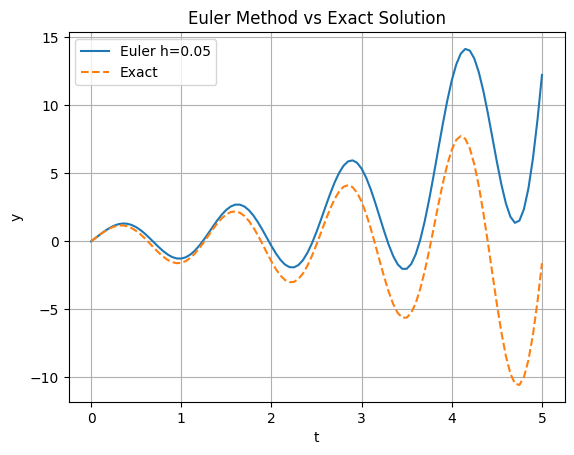


Step size: 0.01
     t   Euler_y   Exact_y     Error
0  1.0 -1.515801 -1.580999  0.065198
1  2.0 -1.239070 -1.478803  0.239733
2  3.0  3.444882  2.914388  0.530494
3  4.0  7.898079  6.745804  1.152275
4  5.0  1.560563 -1.612374  3.172938


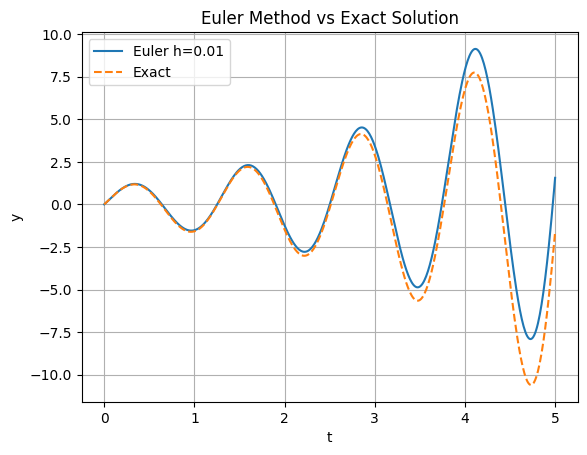


Step size: 0.005
     t   Euler_y   Exact_y     Error
0  1.0 -1.548266 -1.580999  0.032733
1  2.0 -1.358096 -1.478803  0.120707
2  3.0  3.182594  2.914388  0.268206
3  4.0  7.330925  6.745804  0.585122
4  5.0  0.001886 -1.612374  1.614261


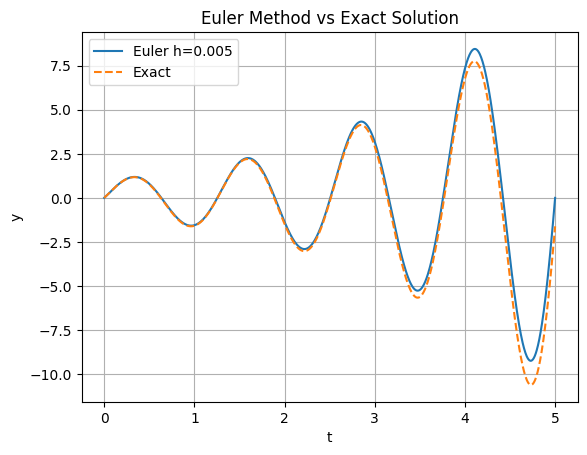


Step size: 0.001
     t   Euler_y   Exact_y     Error
0  1.0 -1.574431 -1.580999  0.006568
1  2.0 -1.454525 -1.478803  0.024277
2  3.0  2.968510  2.914388  0.054122
3  4.0  6.864291  6.745804  0.118488
4  5.0 -1.284983 -1.612374  0.327391


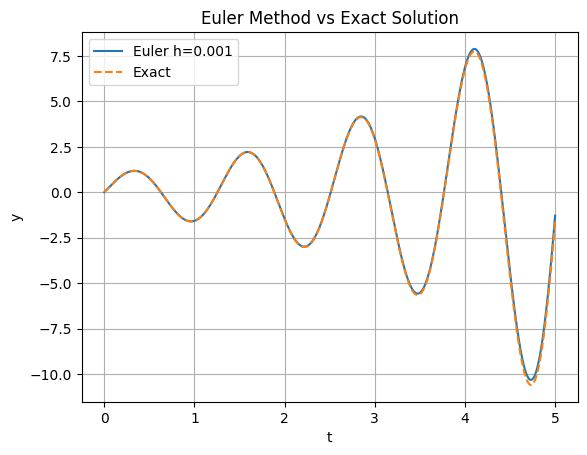

In [10]:
#---------------------B(Euler's Method)---------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def dydt(y, t):
    return y - 0.5*np.exp(t/2) * np.sin(5 * t) + 5 * np.exp(t/2) * np.cos(5 * t)

def f(t):
    return np.exp(t / 2) * np.sin(5 * t)


step_size = [0.1, 0.05, 0.01, 0.005, 0.001]
for h in step_size:
    t_values = np.arange(0, 5 + h, h)
    y_values = np.zeros(len(t_values))

    # Euler's Method
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * dydt(y_values[i-1], t_values[i-1])

    Iter = [1, 2, 3, 4, 5]
    mask = np.isin(t_values, Iter)
    df = pd.DataFrame({
        't': t_values[mask],
        'Euler_y': y_values[mask],
        'Exact_y': f(t_values[mask]),
        'Error' : np.abs(y_values[mask] - f(t_values[mask]))
    })
    print(f"\nStep size: {h}")
    print(df)

    plt.plot(t_values, y_values, label=f"Euler h={h}")
    plt.plot(t_values, f(t_values), label="Exact", linestyle='--')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Euler Method vs Exact Solution')
    plt.grid()
    plt.legend()
    plt.show()



Newton-Raphson Iteration Table:

   Iteration        x_n    x_(n+1)   f(x_(n+1))  Absolute Relative Error
0          1  10.000000  50.152317  5323.529943                 0.800607
1          2  50.152317  61.980013   285.586185                 0.190831
2          3  61.980013  62.689305     0.956731                 0.011314


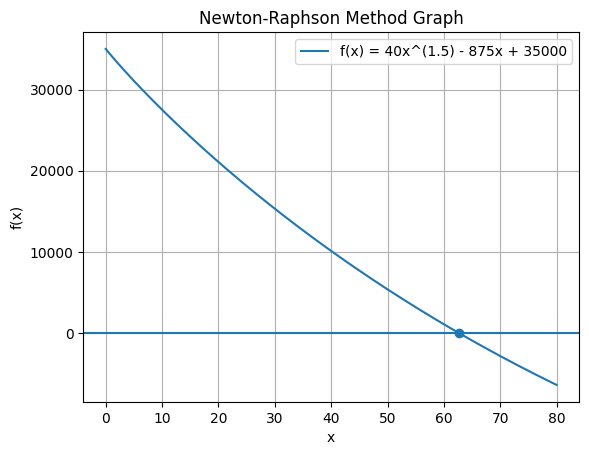

In [11]:
#---------------------(Newton-Raphson Method)---------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define function and derivative
def f(x):
    return 40*x**1.5 - 875*x + 35000

def df(x):
    return 60*x**0.5 - 875

# Initial guess
x0 = 10.0
iterations = 3

# Newton-Raphson Method
results = []
x = x0

for i in range(1, iterations + 1):
    x_new = x - f(x) / df(x)
    abs_relative_error = abs((x_new - x) / x_new)
    results.append([i, x, x_new, f(x_new), abs_relative_error])
    x = x_new

# Create table
table = pd.DataFrame(
    results,
    columns=[
        "Iteration",
        "x_n",
        "x_(n+1)",
        "f(x_(n+1))",
        "Absolute Relative Error"
    ]
)

print("\nNewton-Raphson Iteration Table:\n")
print(table)

# -------- Graph Section -------- #

# Only positive x values (IMPORTANT FIX)
x_vals = np.linspace(0, 80, 400)
y_vals = f(x_vals)

plt.figure()
plt.axhline(0)
plt.plot(x_vals, y_vals, label="f(x) = 40x^(1.5) - 875x + 35000")

# Plot root approximation
plt.scatter(x, f(x))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Newton-Raphson Method Graph")
plt.legend()
plt.grid()
plt.show()


In [ ]:
#---------------------C(Regular Falsi Method)---------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f(x):
     return   x**4-0.165*x**2+3.993*10**-2
    
a=0.0
b=1.0
iter=3 
data=[]
c_old=None


for i in range(1,iter+1):
    c = (a*f(b) - b*f(a)) / (f(b) - f(a))
    
    if c_old is None:
        error = None
    else:
        error = abs((c-c_old)/c)*100
    data.append([i,a,b,c,f(c),error])
    
    if f(a)*f(c)<0:
        b=c
    else:
        a=c
    
    c_old=c
    root=c
    
table=pd.DataFrame(data,columns=["ITER","a","b","c",f"c","Error(%)"])
print(table)
print("\nRoot:",root)


x=np.linspace(0,1,400)
plt.axhline(0)
plt.plot(x,f(x))
plt.scatter(root,f(root))
plt.title("Regular Falsi Method")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [ ]:
#---------------------D(Simpson's 3/8 Rule)---------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



def v(t):
    return 200*np.log(140000/(140000-2100*t)) - 9.8*t

a, b = 8, 30
n = 6
h = (b-a)/n
t = np.linspace(a,b,n+1)

S = v(t[0]) + v(t[-1])
for i in range(1,n):
    S += (3 if i%3!=0 else 2)*v(t[i])
S *= 3*h/8

df = pd.DataFrame({"t": t, "v(t)": v(t)})
print(df)
print("Distance =", S)


plt.plot(t, v(t), marker='o')
plt.title("Rocket Velocity Curve")
plt.grid()
plt.show()

In [ ]:
#-------------------D(Simpson's 1/3 Rule)---------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Velocity function
def v(t):
    return 200*np.log(140000/(140000-2100*t)) - 9.8*t

# Interval limits and number of sub-intervals (n must be even)
a, b = 8, 30
n = 6  # Already even
h = (b-a)/n
t = np.linspace(a, b, n+1)

# Simpson's 1/3 Rule
S = v(t[0]) + v(t[-1])

for i in range(1, n):
    if i % 2 == 0:
        S += 2 * v(t[i])
    else:
        S += 4 * v(t[i])

S *= h/3

# Display table
df = pd.DataFrame({"t": t, "v(t)": v(t)})
print(df)
print("Distance (Simpson's 1/3 Rule) =", S)

# Plot
plt.plot(t, v(t), marker='o')
plt.title("Rocket Velocity Curve")
plt.xlabel("Time t (s)")
plt.ylabel("Velocity v(t) (m/s)")
plt.grid(True)
plt.show()


In [ ]:
#---------------------E(Trapezoidal Rule)---------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function
def f(t):
    return 200*np.log(140000/(140000 - 2100*t)) - 9.8*t

# Given limits
a = 8
b = 30

# (i) Single-segment trapezoidal rule
h = b - a
S_trap = (h/2) * (f(a) + f(b))
print(S_trap)


# True value using fine numerical integration
t_true = np.linspace(a, b, 200000)
S_true = np.trapezoid(f(t_true), t_true)   
print(S_true)


# (ii) True error
E_t = S_true - S_trap
print(E_t)


# (iii) Absolute relative true error
E_r = abs(E_t / S_true)
print(E_r)


# (iv) Tabular data
table = pd.DataFrame({
    "E_D": [S_trap],    #Estimated Distance (m)
    "T_D": [S_true],     #True Distance (m)
    "T_E": [E_t],        #True Error
    "ARTE": [E_r]        #Absolute Relative True Error
})

print("\nTabular Results:\n")
print(table)


# Plot the curve
t_plot = np.linspace(a, b, 400)
plt.figure()
plt.plot(t_plot, f(t_plot))
plt.scatter([a, b], [f(a), f(b)])
plt.xlabel("Time (s)")
plt.ylabel("Velocity Function")
plt.title("Rocket Motion Curve")
plt.grid(True)
plt.show()